In [1]:
pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=dc42816f20875a55ea7e2077089f3f0fc791222a5eeb08e66419ad0f4d0a50ba
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 84.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: autograd
    Found existing installation: autograd 1.6.2
    Uninstalling autograd-1.6.2:
      Successfully uninstalled autograd-1.6.2


In [3]:
import numpy as np
from sentence_transformers import SentenceTransformer
import json
import torch
import torch.nn as nn
import pandas as pd

In [4]:
import pennylane as qml

In [5]:
f = open('dev-v2.0.json')
data = json.load(f)
sent_data = []
for elem in data["data"][0]["paragraphs"]:
    sent_data += elem["context"].split(".")

sent_data =  [i for i in sent_data if i]

In [6]:
model_low = SentenceTransformer('paraphrase-MiniLM-L3-v2')

low_embeddings = model_low.encode(sent_data)

for i in range(len(low_embeddings)):
  low_embeddings[i] = low_embeddings[i]/np.linalg.norm(low_embeddings[i])

In [7]:
model = SentenceTransformer('all-mpnet-base-v2')

true_embeddings = model.encode(sent_data)

In [8]:
string_sim_dict = {}

for i in range(len(true_embeddings)):
  for j in range(len(true_embeddings)):
    if i != j:
      string_sim_dict[(i, j)] = np.dot(true_embeddings[i], true_embeddings[j])


In [9]:
df = pd.DataFrame(string_sim_dict.items(), columns=['Key_Pair', 'Similiarity_Score'])

In [10]:
low_emb_pairs = []
for i, j in list(df["Key_Pair"]):
  low_emb_pairs.append((low_embeddings[i], low_embeddings[j]))

In [11]:
df["Low_Embedding_Representation"] = low_emb_pairs

,Key_Pair,Similiarity_Score,Low_Embedding_Representation
0,"(0, 1)",0.630483,"([-0.12608755, 0.02827671, -0.07979098, -0.029..."
1,"(0, 2)",0.458383,"([-0.12608755, 0.02827671, -0.07979098, -0.029..."
2,"(0, 3)",0.700393,"([-0.12608755, 0.02827671, -0.07979098, -0.029..."
3,"(0, 4)",0.648070,"([-0.12608755, 0.02827671, -0.07979098, -0.029..."
4,"(0, 5)",0.680263,"([-0.12608755, 0.02827671, -0.07979098, -0.029..."
...,...,...,...
995,"(5, 121)",0.285967,"([0.039661493, 0.059136454, -0.029836262, -0.0..."
996,"(5, 122)",0.282957,"([0.039661493, 0.059136454, -0.029836262, -0.0..."
997,"(5, 123)",0.226458,"([0.039661493, 0.059136454, -0.029836262, -0.0..."
998,"(5, 124)",0.062342,"([0.039661493, 0.059136454, -0.029836262, -0.0..."


In [188]:
np.argmin(np.array(df["Similiarity_Score"]))

22219

# Triples dataset

In [ ]:
for i in range(175):
  one_sent_comp = []
  for key in string_sim_dict:
    if key[0] == i:
      one_sent_comp.append(string_sim_dict[key])
  print(f"{i} : {min(one_sent_comp)}, {max(one_sent_comp)}")


In [13]:
possible_data_samples = {}
for i in range(175):
  close = []
  far = []

  for key in string_sim_dict:
    if key[0] == i:
      if string_sim_dict[key] > 0.5:
        close.append(key)
      if string_sim_dict[key] < 0.10:
        far.append(key)
  possible_data_samples[i] = {"close" : close, "far" : far}

In [ ]:
# Порядок: (i, j, k)
# i --- індекс семплу, j - близький, k - далекий

In [ ]:
possible_data_samples

In [15]:
possible_triplets = []

for key in possible_data_samples:
  for close_elem in possible_data_samples[key]['close']:
    for far_elem in possible_data_samples[key]['far']:
      possible_triplets.append((close_elem[0], close_elem[1], far_elem[1]))

In [ ]:
possible_triplets

In [17]:
triple_actual_embeddings = {}

for triplet in possible_triplets:
  triple_actual_embeddings[triplet] = (true_embeddings[triplet[0]], true_embeddings[triplet[1]], true_embeddings[triplet[2]])

In [18]:
triplet_df = pd.DataFrame(triple_actual_embeddings.items(), columns=['Key_Pair', 'True_Embeddings'])

In [19]:
low_dim_emb = []
for i, j, k in list(triplet_df["Key_Pair"]):
  low_dim_emb.append((low_embeddings[i], low_embeddings[j], low_embeddings[k]))

In [20]:
triplet_df["Low_Embedding_Representation"] = low_dim_emb

In [21]:
triplet_df

,Key_Pair,True_Embeddings,Low_Embedding_Representation
0,"(0, 1, 119)","([0.013143951, 0.022354893, -0.0023426749, -0....","([-0.12608755, 0.02827671, -0.07979098, -0.029..."
1,"(0, 1, 124)","([0.013143951, 0.022354893, -0.0023426749, -0....","([-0.12608755, 0.02827671, -0.07979098, -0.029..."
2,"(0, 1, 125)","([0.013143951, 0.022354893, -0.0023426749, -0....","([-0.12608755, 0.02827671, -0.07979098, -0.029..."
3,"(0, 1, 127)","([0.013143951, 0.022354893, -0.0023426749, -0....","([-0.12608755, 0.02827671, -0.07979098, -0.029..."
4,"(0, 1, 132)","([0.013143951, 0.022354893, -0.0023426749, -0....","([-0.12608755, 0.02827671, -0.07979098, -0.029..."
...,...,...,...
19296,"(174, 153, 119)","([0.0076842452, 0.061846003, 0.016777474, 0.03...","([-0.029564302, 0.0019952098, -0.016072346, -0..."
19297,"(174, 153, 121)","([0.0076842452, 0.061846003, 0.016777474, 0.03...","([-0.029564302, 0.0019952098, -0.016072346, -0..."
19298,"(174, 153, 123)","([0.0076842452, 0.061846003, 0.016777474, 0.03...","([-0.029564302, 0.0019952098, -0.016072346, -0..."
19299,"(174, 153, 170)","([0.0076842452, 0.061846003, 0.016777474, 0.03...","([-0.029564302, 0.0019952098, -0.016072346, -0..."


In [ ]:
triplet_df.to_pickle('nlp_dataset_triple_pairs.pkl', compression='infer', protocol=5, storage_options=None)

In [ ]:
# triplet_df.to_csv('triplet.csv')

In [96]:
triplet_df_small = triplet_df[:10000]

# Datasets & Dataloaders


In [ ]:
# triplet_df = pd.read_pickle("nlp_dataset_triple_pairs.pkl")

In [ ]:
# triplet_df = pd.read_csv("nlp_dataset_triple_pairs.pkl")

In [97]:
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.true_emb = df["True_Embeddings"].values
        self.low_dim_emb = df["Low_Embedding_Representation"].values

    def __len__(self):
        return len(self.low_dim_emb)

    def get_batch_true_emb(self, idx):
        return np.array(self.true_emb[idx])

    def get_batch_low_embeddings(self, idx):
        return self.low_dim_emb[idx]

    def __getitem__(self, idx):

        batch_low_embeddings = self.get_batch_low_embeddings(idx)
        batch_true_emb = self.get_batch_true_emb(idx)

        return batch_true_emb, batch_low_embeddings

In [214]:
BATCH_SIZE = 1

n_qubits = 2
q_delta = 0.1
q_depth = 4
emb_dim = 4

In [215]:
dataset = Dataset(triplet_df_small)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [0.9, 0.1])

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle = True)
valid_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size = BATCH_SIZE, shuffle = True)

In [127]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [128]:
quantum_device = qml.device("default.qubit", wires=n_qubits)

# Models

In [203]:
@qml.qnode(quantum_device, interface="torch")
def quantum_net(q_input_features, q_weights_flat):
    q_weights = q_weights_flat.reshape(q_depth, n_qubits)

    qml.AmplitudeEmbedding(features=q_input_features, wires=range(n_qubits), normalize=True)

    for k in range(q_depth):

        for i in range(0, n_qubits):
            qml.CNOT(wires=[i, (i + 1) % n_qubits])

        for idx, element in enumerate(q_weights[k]):
            qml.RY(element, wires=idx)


    return qml.probs(wires=range(n_qubits))

In [204]:
class DressedQuantumNet(nn.Module):
    def __init__(self, num_ftrs):
        super().__init__()
        self.pre_net = nn.Linear(num_ftrs, emb_dim)

        self.q_params = nn.Parameter(q_delta * torch.randn(q_depth * n_qubits))

    def forward(self, input_features):
        pre_out = self.pre_net(input_features[0])


        q_in = pre_out

        q_out = torch.Tensor(0, n_qubits).to(device)

        q_out_elem = quantum_net(q_in, self.q_params)
        # print(q_out_elem.shape)

        return q_out_elem

    def get_emb(self, input_features):
        pre_out = self.pre_net(input_features)
        return pre_out

In [205]:
def train_model(model, tr_dataloader, val_dataloader, criterion, optimizer, scheduler, num_epochs=25):

  for epoch in range(num_epochs):
      print(f'Epoch {epoch}/{num_epochs - 1}')
      print('-' * 10)

      total_loss_train = 0

      for true_emb, low_emb in tr_dataloader:

          true_emb = true_emb.to(device)

          # zero the parameter gradients
          optimizer.zero_grad()

            # forward
            # track history if only in train

          anchor, positive, negative  = model(low_emb[0]), model(low_emb[1]), model(low_emb[2])

          batch_loss = criterion(anchor, positive, negative)
          total_loss_train += batch_loss.item()

          batch_loss.backward()


          optimizer.step()


      total_loss_val = 0

      with torch.no_grad():

          for val_true_emb, val_low_emb in val_dataloader:

              val_true_emb = val_true_emb.to(device)

              anchor, positive, negative  = model(val_low_emb[0]), model(val_low_emb[1]), model(val_low_emb[2])

              batch_loss = criterion(anchor, positive, negative)

              total_loss_val += batch_loss.item()


      print(

            f'Epoch: {epoch + 1} | Train Loss: {total_loss_train / len(tr_dataloader): .3f} \
            | Val Loss: {total_loss_val / len(val_dataloader): .3f}')




      if epoch % 5 == 0:

          model_path = f"Model_Epoch{epoch}.pth"

          torch.save(model.state_dict(), model_path)

In [206]:
model = DressedQuantumNet(384)

loss = nn.TripletMarginLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [ ]:
model_ft, model_loss, model_acc = train_model(model, train_dataloader, valid_dataloader, loss,
                                              optimizer, exp_lr_scheduler, num_epochs=50)

In [216]:
model_ = DressedQuantumNet(384)
model_.load_state_dict(torch.load("/content/Model_Epoch10__2_qubits.pth"))

<All keys matched successfully>

In [ ]:
low_embeddings[5]

In [220]:
close_true = []
close_model = []

dif_true = []
dif_model = []
with torch.no_grad():

          for val_true_emb, val_low_emb in valid_dataloader:

              anchor, positive, negative  = model_(val_low_emb[0]), model_(val_low_emb[1]), model_(val_low_emb[2])

              close_model.append(np.dot(anchor, positive))
              dif_model.append(np.dot(anchor, negative))

              close_true.append(np.dot(val_true_emb[0, 0, :], val_true_emb[0, 1, :]))
              dif_true.append(np.dot(val_true_emb[0, 0, :], val_true_emb[0, 2, :]))



In [227]:
close_error = []

for i in range(len(close_model)):
  close_error.append(1 - close_model[i])

In [229]:
print(np.mean(close_error))

0.1611293907397427


In [230]:
print(np.mean(dif_model))

0.05473250874711943


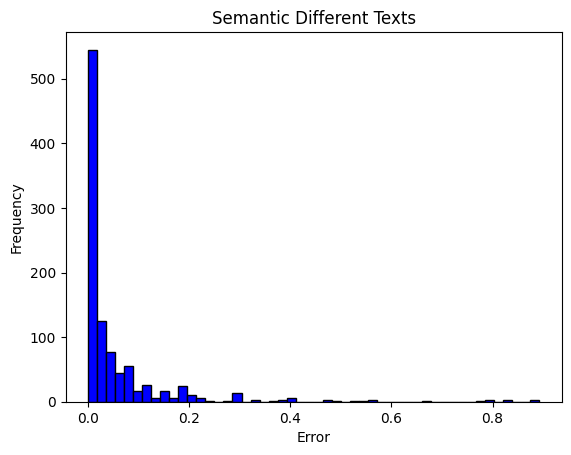

In [236]:
import matplotlib.pyplot as plt

# Sample data (replace this with your own data)
data = dif_model

# Plot the histogram
plt.hist(data, bins=50, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Semantic Different Texts')

# Display the histogram
plt.show()